### importing the necessary libraries

In [148]:
#libraries for data manipulation
import pandas as pd
import numpy as np

# libraries for visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# removing of column limits
pd.set_option("display.max_columns", None)
# setting row limit display
pd.set_option("display.max_row",100)

# train test split of the data
from sklearn.model_selection import train_test_split

# linear regression model
from sklearn.linear_model import LinearRegression

# metrics evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Load the dataset

In [149]:
#loading the dataset
path = r"C:\Users\obinn\AILEAD\Regression\used_cars_data-1.csv"
data = pd.read_csv(path)

### Initial data exploration

In [150]:
#shape of the data
data.shape

(7253, 14)

- There are 14 columns and 7253 rows in the dataset

In [151]:
# Overview of the first 5 rows
data.head(5)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,5.51,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,16.06,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,11.27,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,53.14,17.74


In [152]:
df['Name'].unique()

array(['Maruti Wagon R LXI CNG', 'Hyundai Creta 1.6 CRDi SX Option',
       'Honda Jazz V', ..., 'Ford EcoSport 1.5 Petrol Ambiente',
       'Jeep Compass 1.4 Sport', 'Hyundai Elite i20 Magna Plus'],
      dtype=object)

In [165]:
df['Mileage'].info()

<class 'pandas.core.series.Series'>
Int64Index: 7075 entries, 0 to 7252
Series name: Mileage
Non-Null Count  Dtype 
--------------  ----- 
7075 non-null   object
dtypes: object(1)
memory usage: 368.6+ KB


In [155]:
df['Power']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
7248   NaN
7249   NaN
7250   NaN
7251   NaN
7252   NaN
Name: Power, Length: 7075, dtype: float64

In [94]:
#copy the data to another location in memory
df = data.copy()

In [95]:
# drop unnecessary columns. The serial number is inconsequential to our analysis so it is removed.
df.drop("S.No.",axis= 1,inplace= True)

In [96]:
# we get an overview of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7078 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          7253 non-null   float64
 12  Price              6019 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 736.8+ KB


- it can be observed that missing values are found Mileage, Engine, Power, Seats and Price columns
- also we have a mixture of 3 variables types across the  dataset (object, int64 and float64)

In [97]:
# check for duplicated columns
df.duplicated().sum()

1

- only one duplicate exist so we drop the duplicates

In [98]:
df.drop_duplicates(inplace= True)
df.shape

(7252, 13)

In [99]:
df.describe(include= 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,7252,2041,Mahindra XUV500 W8 2WD,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,7252,11,Mumbai,948,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7252.0,NaN,NaN,NaN,2013.36583,3.254405,1996.0,2011.0,2014.0,2016.0,2019.0
Kilometers_Driven,7252.0,NaN,NaN,NaN,58699.9869,84433.505524,171.0,34000.0,53429.0,73000.0,6500000.0
Fuel_Type,7252,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7252,2,Manual,5203,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7252,4,First,5951,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7250,450,17.0 kmpl,206,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine,7206,150,1197 CC,732,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Power,7077,385,74 bhp,280,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Observations

- cars currently being sold and bought in India were manufactured between 1996 and 2019
- Manual transmision and diesel based cars were most popular
- used car prices ranged from 0.44 to 160 while new car prices ranged from 21.31 to 375.0

### Next we explore the categorical variables

In [100]:
categorical_var = df.select_dtypes(include = ["object"]).columns.to_list()

In [101]:
# we find out the how many non-empty unique rows in each category
for cat in categorical_var:
    print (df[cat].value_counts())
    print ("-"* 40)

Mahindra XUV500 W8 2WD                  55
Maruti Swift VDI                        49
Maruti Swift Dzire VDI                  42
Honda City 1.5 S MT                     39
Maruti Swift VDI BSIV                   37
                                        ..
Chevrolet Beat LT Option                 1
Skoda Rapid 1.6 MPI AT Elegance Plus     1
Ford EcoSport 1.5 TDCi Ambiente          1
Hyundai i10 Magna 1.1 iTech SE           1
Hyundai Elite i20 Magna Plus             1
Name: Name, Length: 2041, dtype: int64
----------------------------------------
Mumbai        948
Hyderabad     876
Coimbatore    772
Kochi         772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: Location, dtype: int64
----------------------------------------
Diesel      3852
Petrol      3324
CNG           62
LPG           12
Electric       2
Name: Fuel_Type, dtype: int64
----------------------------------------
Manual       5203
Autom

### Obervation 
- electric cars are not a popular option for used cars
- there more manual than automatic transmission cars
- there are also more cars in mumbai than any other location

In [102]:
num_var = df.select_dtypes(exclude= "object").columns.to_list()
num_var

['Year', 'Kilometers_Driven', 'Seats', 'New_Price', 'Price']

## Univariate Analysis

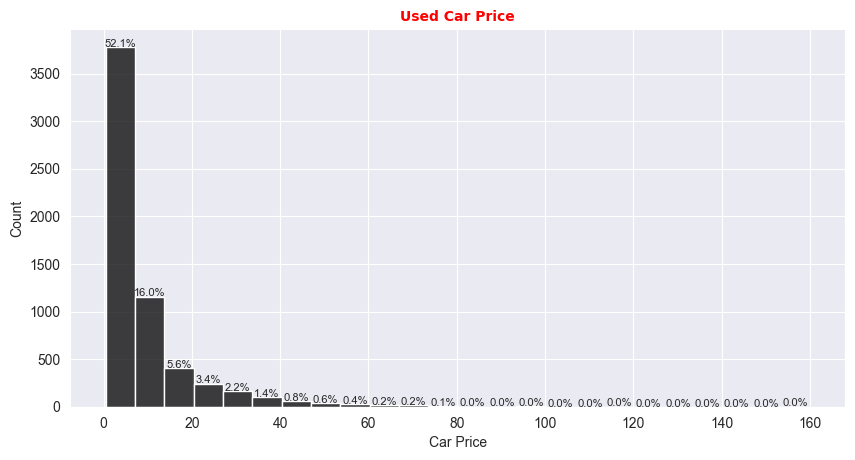

In [103]:
#find the distribution of used car prices
font = {'family': 'DejaVu Sans',
        'color':  'red',
        'weight': 'semibold',
        'size': 10,
        }

plt.figure(figsize=(10,5),dpi = 100)
sns.set_style('darkgrid')
u_car = sns.histplot(data=df,x='Price', bins=24, color = 'black')
plt.xlabel('Car Price')
plt.ylabel('Count')
plt.title('Used Car Price')
for x in u_car.patches:
  height = x.get_height()
  u_car.text(x.get_x()+x.get_width()/2, height+3,'{:1.1f}'.format((height/len(df))*100)+'%',ha='center', fontsize = 8)
plt.title('Used Car Price', fontdict= font)
plt.show()

- the price of used vehicles is skewed to right as majority of used car prices is between 0.44 and 20 (about 80%)

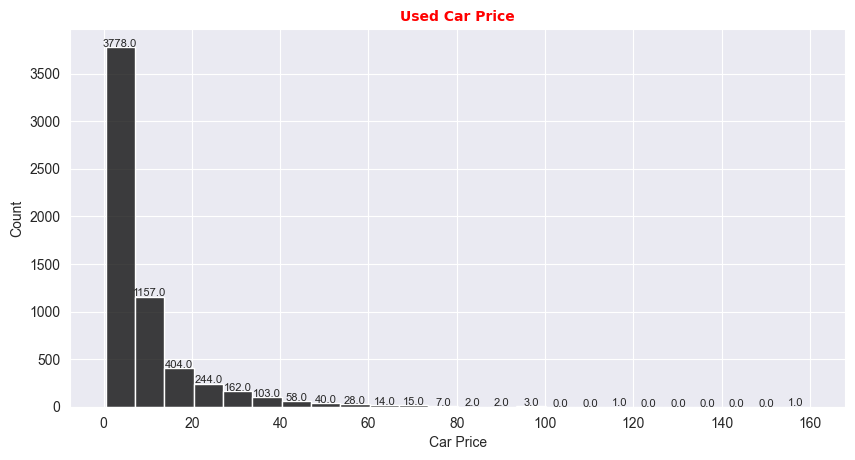

In [104]:
#find the distribution of used car prices
font = {'family': 'DejaVu Sans',
        'color':  'red',
        'weight': 'semibold',
        'size': 10,
        }

plt.figure(figsize=(10,5),dpi = 100)
sns.set_style('darkgrid')
u_car = sns.histplot(data=df,x='Price', bins=24, color = 'black')
plt.xlabel('Car Price')
plt.ylabel('Count')
plt.title('Used Car Price')
for x in u_car.patches:
  height = x.get_height()
  u_car.text(x.get_x()+x.get_width()/2, height+3,'{:1.1f}'.format(height),ha='center', fontsize = 8)
plt.title('Used Car Price', fontdict= font)
plt.show()

In [105]:
### Bivariate Analysis

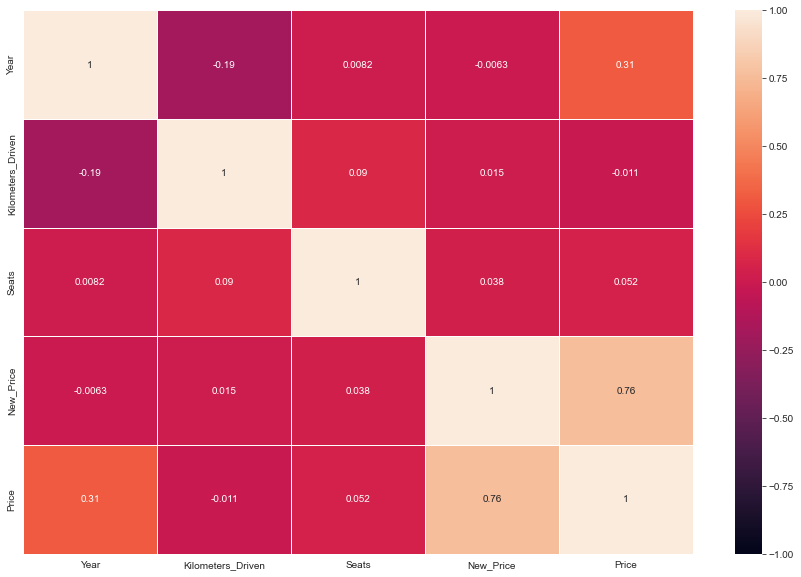

In [106]:
plt.figure(figsize=(15,10))
corr= df.corr()

sns.heatmap(corr, linewidths=.5,annot= True, vmin=-1, vmax=1)
plt.show()

- there is high positive correlation between used car prices and new car prices (0.76)

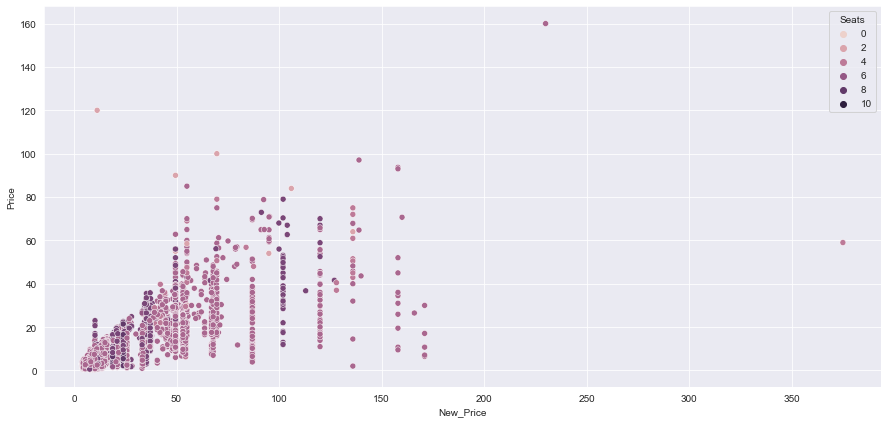

In [107]:
plt.figure(figsize=(15, 7))
sns.scatterplot(y="Price", x="New_Price", data=df , hue = "Seats")
plt.show()

### Data Pre-processing

In [108]:
# check for missing values

df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_Price               0
Price                1233
dtype: int64

**Observation**

- There are missing values in both numerical and categorical columns.

- We will impute missing values in numerical columns with column median grouped by *room_type*.

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7252 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7252 non-null   object 
 1   Location           7252 non-null   object 
 2   Year               7252 non-null   int64  
 3   Kilometers_Driven  7252 non-null   int64  
 4   Fuel_Type          7252 non-null   object 
 5   Transmission       7252 non-null   object 
 6   Owner_Type         7252 non-null   object 
 7   Mileage            7250 non-null   object 
 8   Engine             7206 non-null   object 
 9   Power              7077 non-null   object 
 10  Seats              7199 non-null   float64
 11  New_Price          7252 non-null   float64
 12  Price              6019 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 793.2+ KB


In [110]:
# select only numerical columns 
numeric_columns = df.select_dtypes(include = np.number).columns.tolist()
numeric_columns

['Year', 'Kilometers_Driven', 'Seats', 'New_Price', 'Price']

In [111]:
#filter out the columns without nan values
for x in numeric_columns:
    if x in ['Year', 'Kilometers_Driven', 'New_Price' ]:
        numeric_columns.remove(x)



#Impute missing values in numerical columns with median grouped by seats

df[numeric_columns] = df.groupby(["Owner_Type"])[numeric_columns].transform(lambda x: x.fillna(x.median()))

In [76]:
# select only categorical columns 
cat_columns = df.select_dtypes(include ="object").columns.tolist()
cat_columns

['Name',
 'Location',
 'Fuel_Type',
 'Transmission',
 'Owner_Type',
 'Mileage',
 'Engine',
 'Power']

In [112]:
df.dropna(axis =0, inplace =True)

In [113]:
df.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
New_Price            0
Price                0
dtype: int64

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7075 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7075 non-null   object 
 1   Location           7075 non-null   object 
 2   Year               7075 non-null   int64  
 3   Kilometers_Driven  7075 non-null   int64  
 4   Fuel_Type          7075 non-null   object 
 5   Transmission       7075 non-null   object 
 6   Owner_Type         7075 non-null   object 
 7   Mileage            7075 non-null   object 
 8   Engine             7075 non-null   object 
 9   Power              7075 non-null   object 
 10  Seats              7075 non-null   float64
 11  New_Price          7075 non-null   float64
 12  Price              7075 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 773.8+ KB


In [115]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,7075,1969,Mahindra XUV500 W8 2WD,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,7075,11,Mumbai,933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7075.0,NaN,NaN,NaN,2013.480989,3.153194,1998.0,2012.0,2014.0,2016.0,2019.0
Kilometers_Driven,7075.0,NaN,NaN,NaN,58257.544594,85230.036109,171.0,33437.5,53000.0,72569.5,6500000.0
Fuel_Type,7075,4,Diesel,3784,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7075,2,Manual,5050,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7075,4,First,5841,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7075,448,18.9 kmpl,201,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine,7075,143,1197 CC,728,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Power,7075,384,74 bhp,280,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Outlier Detection

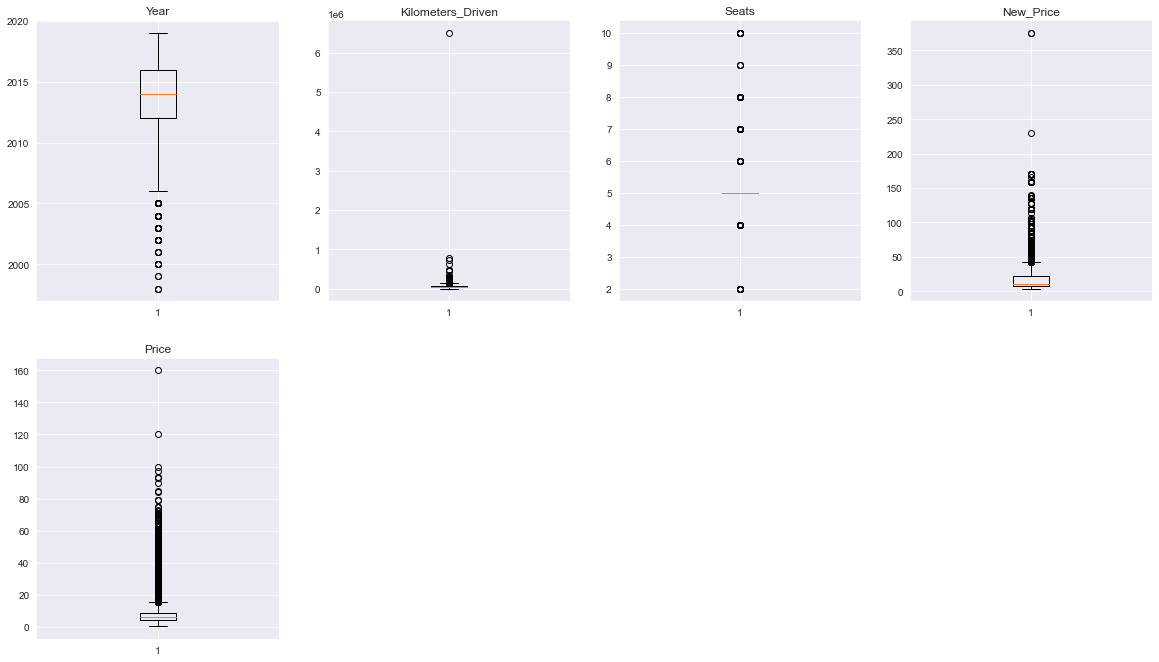

In [127]:
# outlier detection using boxplot
numeric_columns = df.select_dtypes(include=np.number)
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df[variable])
#     plt.tight_layout()  # to avoid the title from overlapping
    plt.title(variable)

plt.show()

- Year has lower outliers
- seats has both upper and lower outliers
- the rest have upper outliers

### Outlier Treatment

In [128]:
# illustrate clipping values to minimum and maximum

l1 = [-200, 5, 0, 1000]

np.clip(l1, 0, 5)

array([0, 5, 0, 5])

In [129]:
def treat_outliers(df, col):
    """
    treats outliers in a varaible
    col: str, name of the numerical varaible
    df: data frame
    col: name of the column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR
    df[col] = np.clip(
        df[col], Lower_Whisker, Upper_Whisker
    )  # all the values samller than Lower_Whisker will be assigned value of Lower_whisker
    # and all the values above upper_whisker will be assigned value of upper_Whisker
    return df


def treat_outliers_all(df, col_list):
    """
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

In [130]:
# treating the outliers
numerical_col = df.select_dtypes(include=np.number).columns.tolist()
df = treat_outliers_all(df, numerical_col)

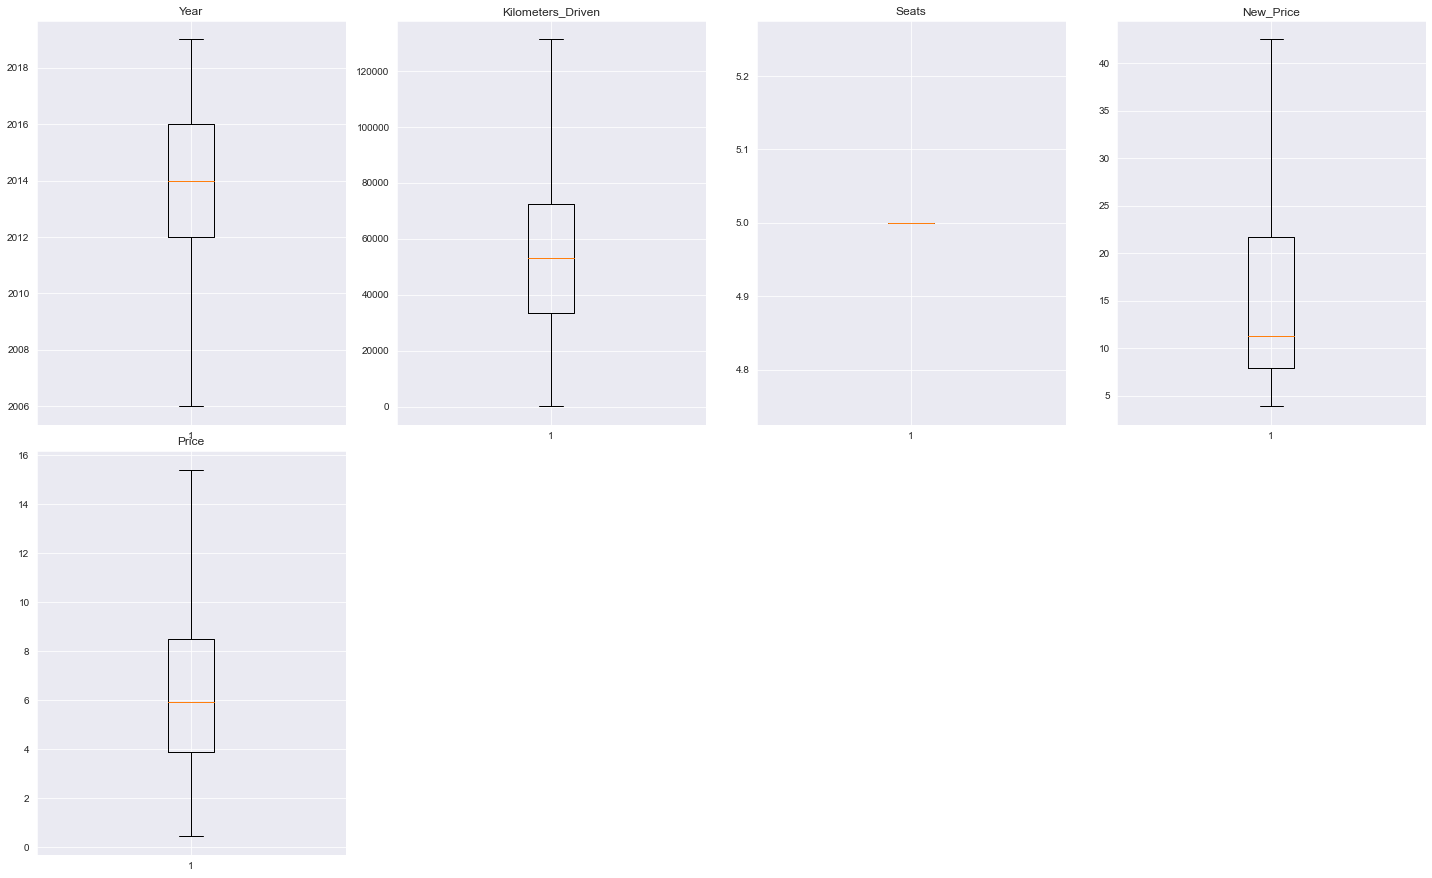

In [131]:
# let's look at the boxplots to see if the outliers have been treated or not
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [132]:
# defining the dependent and independent variables
X = df.drop(["Price"], axis=1, )
y = df["Price"]

In [133]:
# creating dummy variables
X = pd.get_dummies(X, drop_first=True)
X.head()

Year  Kilometers_Driven  Seats  New_Price  \
0  2010.0            72000.0    5.0      5.510   
1  2015.0            41000.0    5.0     16.060   
2  2011.0            46000.0    5.0      8.610   
3  2012.0            87000.0    5.0     11.270   
4  2013.0            40670.0    5.0     42.515   

   Name_Audi A3 35 TDI Attraction  Name_Audi A3 35 TDI Premium  \
0                               0                            0   
1                               0                            0   
2                               0                            0   
3                               0                            0   
4                               0                            0   

   Name_Audi A3 35 TDI Premium Plus  Name_Audi A3 35 TDI Technology  \
0                                 0                               0   
1                                 0                               0   
2                                 0                               0   
3                                 0                               0   
4                                 0                               0   

   Name_Audi A4 1.8 TFSI  Name_Audi A4 1.8 TFSI Technology Edition  \
0                      0                                         0   
1                      0                                         0   
2                      0                                         0   
3                      0                                         0   
4                      0                                         0   

   Name_Audi A4 2.0 TDI  Name_Audi A4 2.0 TDI 177 Bhp Premium Plus  \
0                     0                                          0   
1                     0                                          0   
2                     0                                          0   
3                     0                                          0   
4                     0                                          0   

   Name_Audi A4 2.0 TDI 177 Bhp Technology Edition  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   Name_Audi A4 2.0 TDI Celebration Edition  Name_Audi A4 2.0 TDI Multitronic  \
0                                         0                                 0   
1                                         0                                 0   
2                                         0                                 0   
3                                         0                                 0   
4                                         0                                 0   

   Name_Audi A4 2.0 TDI Premium Sport Limited Edition  Name_Audi A4 2.0 TFSI  \
0                                                  0                       0   
1                                                  0                       0   
2                                                  0                       0   
3                                                  0                       0   
4                                                  0                       0   

   Name_Audi A4 3.0 TDI Quattro  Name_Audi A4 3.0 TDI Quattro Premium  \
0                             0                                     0   
1                             0                                     0   
2                             0                                     0   
3                             0                                     0   
4                             0                                     0   

   Name_Audi A4 30 TFSI Premium Plus  Name_Audi A4 35 TDI Premium  \
0                                  0                            0   
1                                  0                            0   
2                                  0                            0   
3                             

In [134]:
# splitting the data in 70:30 ratio for train to test data
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [135]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 5306
Number of rows in test data = 1769


In [136]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_sd = scaler.fit_transform(x_train)
x_test_sd = scaler.transform(x_test)

In [137]:
# fitting the linear model
lin_reg_model = LinearRegression()
lin_reg_model.fit(x_train_sd, y_train)

LinearRegression()

**Let's check the performance of the model using different metrics.**

* We will be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.
* We will define a function to calculate MAPE and adjusted $R^2$.
* The mean absolute percentage error (MAPE) measures the accuracy of predictions as a percentage, and can be calculated as the average absolute percent error for each predicted value minus actual values divided by actual values. It works best if there are no extreme values in the data and none of the actual values are 0.
    
* We will create a function which will print out all the above metrics in one go.

In [138]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# # function to compute MAPE
# def mape_score(targets, predictions):
#     return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
#     mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2
        },
        index=[0],
    )

    return df_perf

In [139]:
# Checking model performance on train set
lin_reg_model_perf_train = model_performance_regression(lin_reg_model, x_train_sd, y_train)
lin_reg_model_perf_train

,RMSE,MAE,R-squared,Adj. R-squared
0,2.398731,1.733026,0.684782,0.286591


In [140]:
# the error recorded is really high with a mean absolute error of 1.73

### Feature Selection

In [141]:
pip install mlxtend==0.20.0

  Using cached mlxtend-0.20.0-py2.py3-none-any.whl (1.3 MB)
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.19.0
    Uninstalling mlxtend-0.19.0:
      Successfully uninstalled mlxtend-0.19.0
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\obinn\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [142]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

reg = LinearRegression()

# Build step forward feature selection
sfs = SFS(
    reg,
    k_features=x_train.shape[1],
    forward=True,  # k_features denotes "Number of features to select"
    floating=False,
    scoring="r2",
    verbose=2,
    n_jobs=-1,  # this will ensure all CPU cores are being used for computation
    cv=5,
)

# Perform SFFS
sfs = sfs.fit(x_train_sd, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   43.7s
[Parallel(n_jobs=-1)]: Done 844 tasks      | elapsed:   52.0s
[Parallel(n_jobs=-1)]: Done 2468 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 2961 out of 2961 | elapsed:  1.1min finished

[2022-11-13 20:30:20] Features: 1/2961 -- score: 0.5617846218926015[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 1308 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done 2440 tasks      | elapsed:   24.4s
[Parallel(n_jobs=-1)]: Done 2960 out of 2960 | elapsed:   28.8s finished

[2022-11-13 20:30:49] Features: 2/2961 -- score: 0.7080841729341174[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:

[Parallel(n_jobs=-1)]: Done 1272 tasks      | elapsed:   40.0s
[Parallel(n_jobs=-1)]: Done 2002 tasks      | elapsed:   57.1s
[Parallel(n_jobs=-1)]: Done 2892 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 2946 out of 2946 | elapsed:  1.3min finished

[2022-11-13 20:41:46] Features: 16/2961 -- score: 0.7421281270977078[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 706 tasks      | elapsed:   16.3s
[Parallel(n_jobs=-1)]: Done 1272 tasks      | elapsed:   45.1s
[Parallel(n_jobs=-1)]: Done 2002 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 2892 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 2938 out of 2945 | elapsed:  1.4min remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 2945 out of 2945 | elapsed:  1.4min finished

[2022-11-13 20:43:09] Features: 17/2961 -- score: 0.743340921

[Parallel(n_jobs=-1)]: Done 256 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 605 tasks      | elapsed:   30.9s
[Parallel(n_jobs=-1)]: Done 932 tasks      | elapsed:   45.1s
[Parallel(n_jobs=-1)]: Done 1605 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 2284 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 2933 out of 2933 | elapsed:  2.5min finished

[2022-11-13 21:10:42] Features: 29/2961 -- score: 0.7569915099634807[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 230 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done 433 tasks      | elapsed:   19.5s
[Parallel(n_jobs=-1)]: Done 716 tasks      | elapsed:   40.5s
[Parallel(n_jobs=-1)]: Done 1081 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1526 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 2053 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 2660 

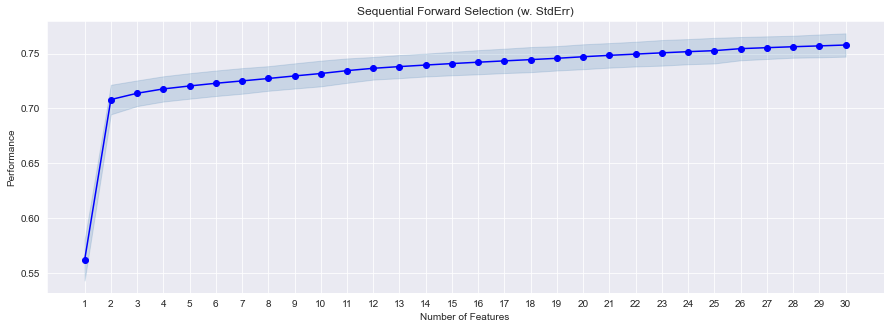

In [143]:
# to plot the performance with addition of each feature
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

fig1 = plot_sfs(sfs.get_metric_dict(), kind="std_err", figsize=(15, 5))
plt.title("Sequential Forward Selection (w. StdErr)")
plt.show()